In [17]:
# Data Processing and Wrangling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Graphing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from mpl_toolkits.mplot3d import Axes3D


# Machine learning libraries
import keras
import torch

# Reporting
from sklearn.metrics import classification_report

# Introduction
This data set used is the NASA JPL Asteroid database, which tracks asteroid objects over time. What I intend to do with this data is build a model that predicts which objects will be flagged as Potentially Hazardous objects or 'pha'. The web page for the data can be found on Kaggle here: https://www.kaggle.com/sakhawat18/asteroid-dataset

In [18]:
include_cols = ['spkid', 'pha', 'neo', 'H', 'diameter', 'albedo', 'epoch_mjd', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'class', 'rms']
explicit_dtypes = {}#'class': 'category', 'pha': 'category', 'neo': 'category'}
df = pd.read_csv('/content/drive/MyDrive/Documents/414 Final/dataset.csv', index_col = 'spkid', na_values=np.nan, usecols = include_cols, dtype=explicit_dtypes)
df2 = df.dropna(subset=['pha', 'neo'])
pha_new = df2.loc[:, 'pha'].map({'Y': 1, 'N': 0})
neo_new = df2.loc[:, 'neo'].map({'Y':1, 'N':0})
#print(df2['class'].unique())
class_new = df2.loc[:, 'class'].map({'MBA':1, 'OMB':2, 'MCA':3, 'AMO':4, 'IMB':5, 'TJN':6, 'CEN':7, 'APO':8, 'ATE':9, 'AST':10, 'TNO':11, 'IEO':12})
df2.loc[:, 'pha'] = pha_new
df2.loc[:, 'neo'] = neo_new
df2.loc[:, 'class'] = class_new
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938599 entries, 2000001 to 3246553
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        938599 non-null  int64  
 1   pha        938599 non-null  int64  
 2   H          932337 non-null  float64
 3   diameter   136209 non-null  float64
 4   albedo     135103 non-null  float64
 5   epoch_mjd  938599 non-null  int64  
 6   e          938599 non-null  float64
 7   a          938599 non-null  float64
 8   q          938599 non-null  float64
 9   i          938599 non-null  float64
 10  om         938599 non-null  float64
 11  w          938599 non-null  float64
 12  ma         938598 non-null  float64
 13  ad         938599 non-null  float64
 14  n          938599 non-null  float64
 15  tp         938599 non-null  float64
 16  tp_cal     938599 non-null  float64
 17  per        938599 non-null  float64
 18  per_y      938599 non-null  float64
 19  moid       93859

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938599 entries, 2000001 to 3246553
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        938599 non-null  int64  
 1   pha        938599 non-null  int64  
 2   H          932337 non-null  float64
 3   diameter   136209 non-null  float64
 4   albedo     135103 non-null  float64
 5   epoch_mjd  938599 non-null  int64  
 6   e          938599 non-null  float64
 7   a          938599 non-null  float64
 8   q          938599 non-null  float64
 9   i          938599 non-null  float64
 10  om         938599 non-null  float64
 11  w          938599 non-null  float64
 12  ma         938598 non-null  float64
 13  ad         938599 non-null  float64
 14  n          938599 non-null  float64
 15  tp         938599 non-null  float64
 16  tp_cal     938599 non-null  float64
 17  per        938599 non-null  float64
 18  per_y      938599 non-null  float64
 19  moid       93859

In [20]:
num_data = df2.select_dtypes(exclude=['category', 'object'])
imp_num = SimpleImputer(strategy='mean')
imp_data = imp_num.fit_transform(num_data)

#imped_num = imp_num.transform(num_data)

imp_num_data = pd.DataFrame(data=imp_data, index=df2.index, columns=num_data.columns)

In [21]:
# Preprocessing Start
# Set random seed
# Separate values X and y.
cat_data = df2.select_dtypes(include='object')
df3 = pd.merge(imp_num_data, cat_data, left_index=True, right_index=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938599 entries, 2000001 to 3246553
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        938599 non-null  float64
 1   pha        938599 non-null  float64
 2   H          938599 non-null  float64
 3   diameter   938599 non-null  float64
 4   albedo     938599 non-null  float64
 5   epoch_mjd  938599 non-null  float64
 6   e          938599 non-null  float64
 7   a          938599 non-null  float64
 8   q          938599 non-null  float64
 9   i          938599 non-null  float64
 10  om         938599 non-null  float64
 11  w          938599 non-null  float64
 12  ma         938599 non-null  float64
 13  ad         938599 non-null  float64
 14  n          938599 non-null  float64
 15  tp         938599 non-null  float64
 16  tp_cal     938599 non-null  float64
 17  per        938599 non-null  float64
 18  per_y      938599 non-null  float64
 19  moid       93859

<Figure size 7200x7200 with 0 Axes>

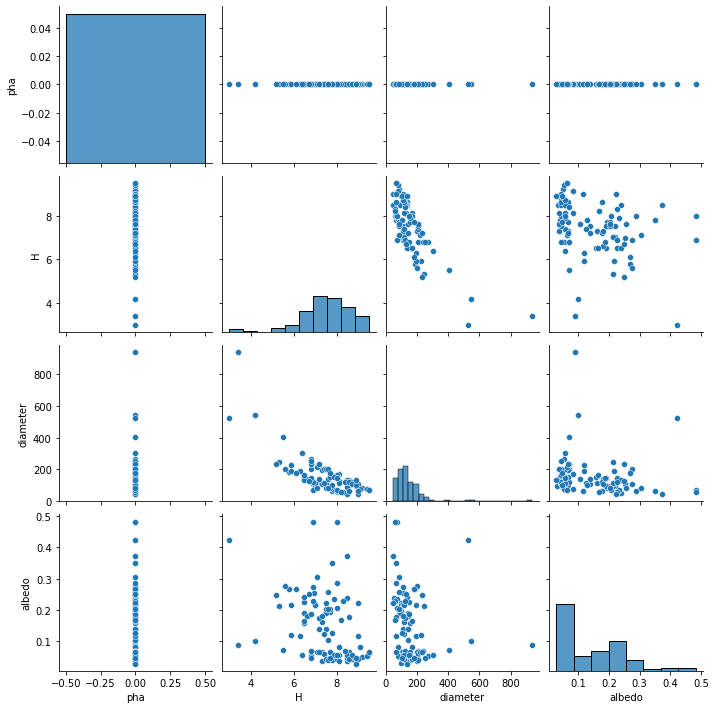

In [22]:
# To many parameters to print normally, so I used a different
fig = plt.figure(figsize=(100,100))
plt_snippet = df3[:100]
snsplot = sns.pairplot(plt_snippet.iloc[:,[1,2,3,4]])
plt.show()
#snsplot.savefig(f"/content/drive/MyDrive/Pictures/output.png")

In [23]:
#code = LabelEncoder()

y = df3.pop('pha')
#code.fit_transform(y)
X = df3
feats = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train.describe(), y_test.describe()

(count    563159.000000
 mean          0.002218
 std           0.047042
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           0.000000
 max           1.000000
 Name: pha, dtype: float64, count    375440.000000
 mean          0.002176
 std           0.046598
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           0.000000
 max           1.000000
 Name: pha, dtype: float64)

In [24]:
model_outputs = {}
def get_pred(model_func, x, y, x_t):
  model = model_func.fit(x, y)
  y_predicted = model.predict(x_t)
  return y_predicted

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)
model_outputs['logreg'] = model_outputs.get('logreg', get_pred(logreg, X_train, y_train, X_test))

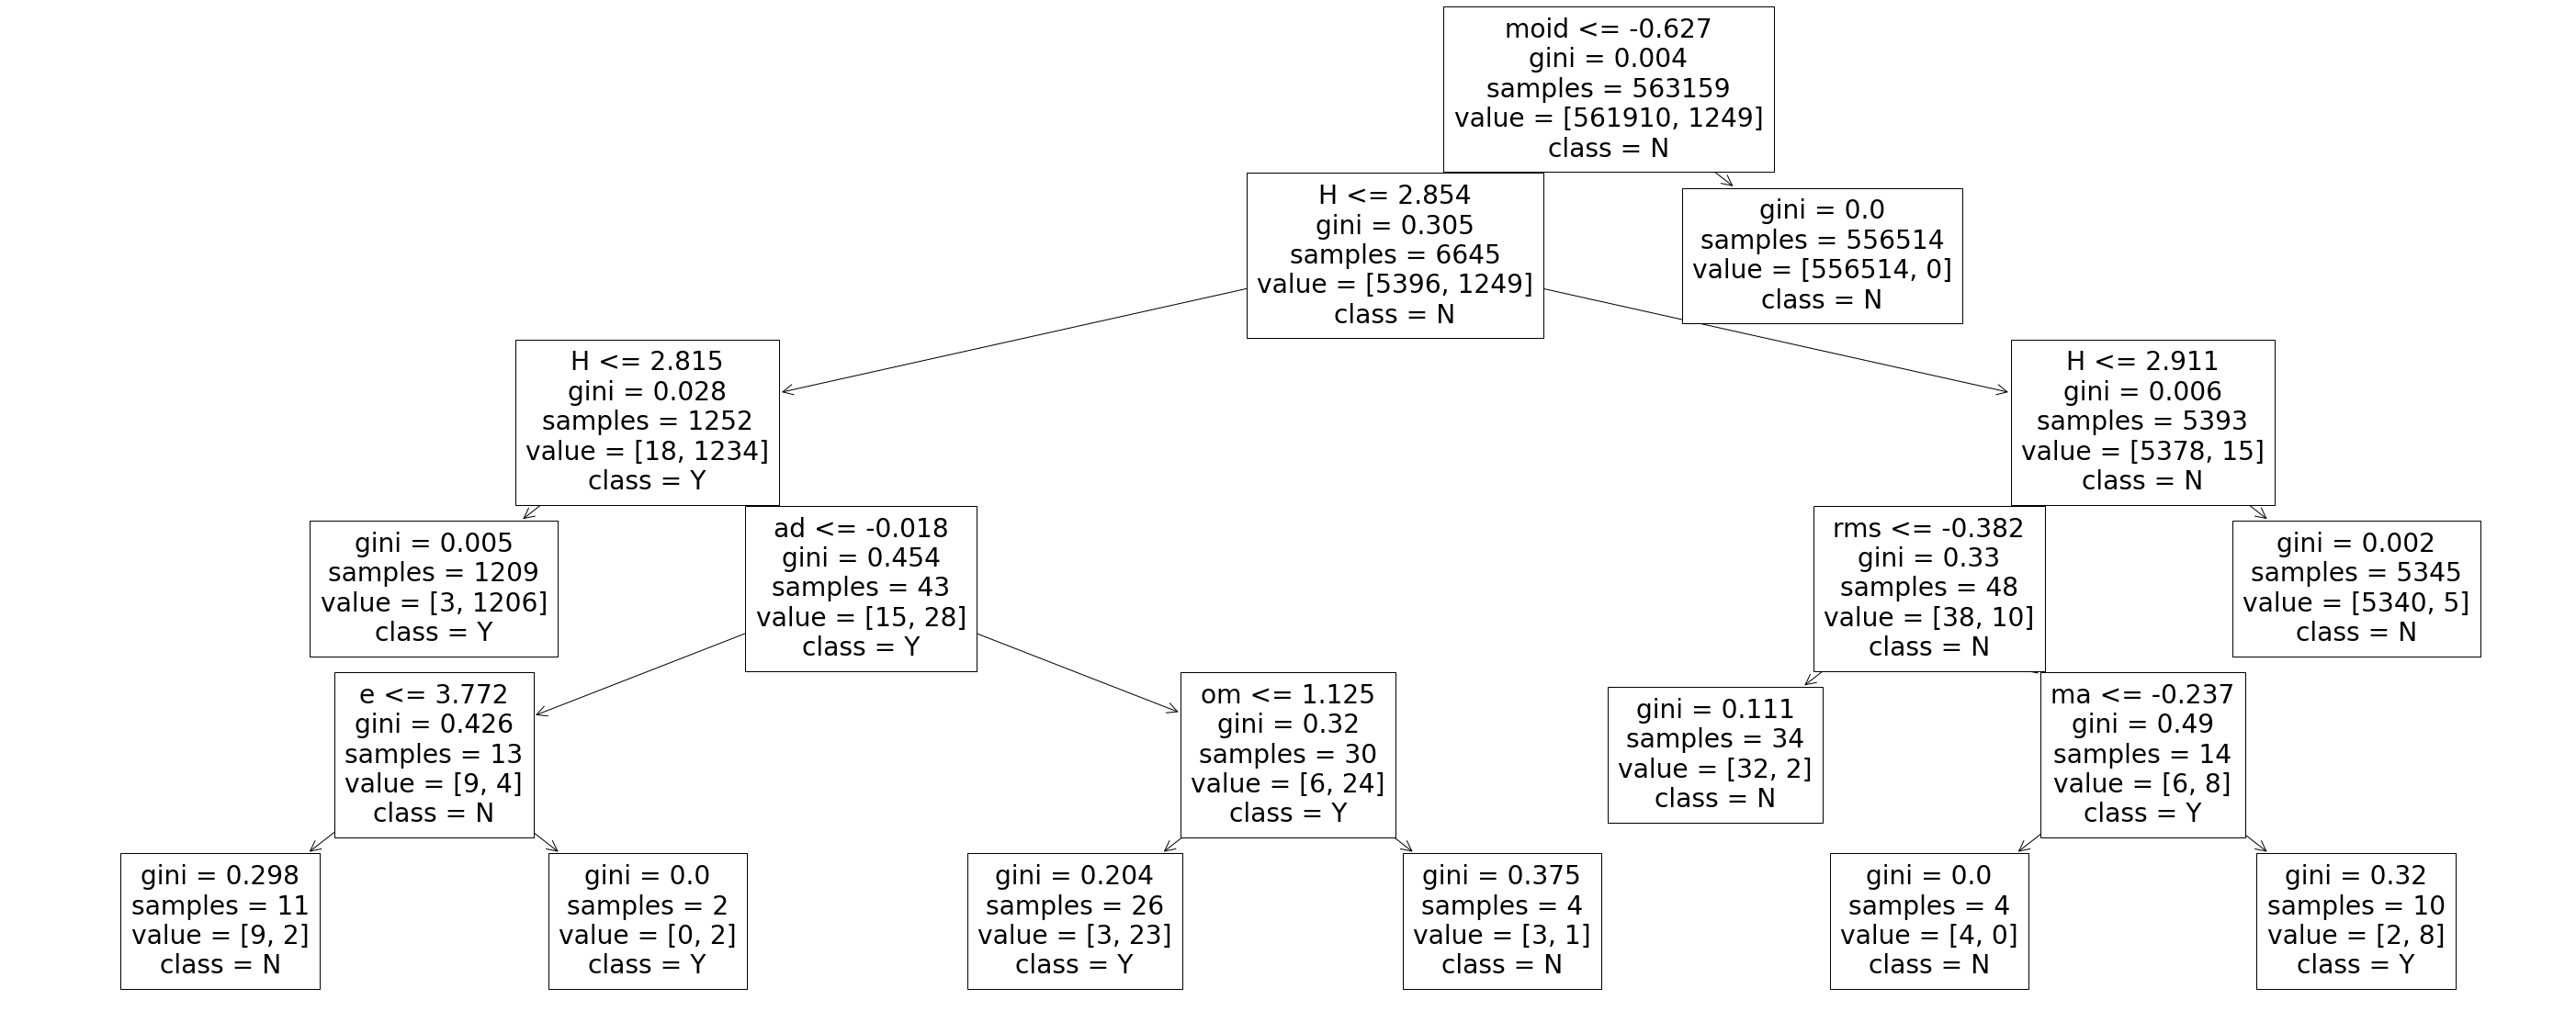

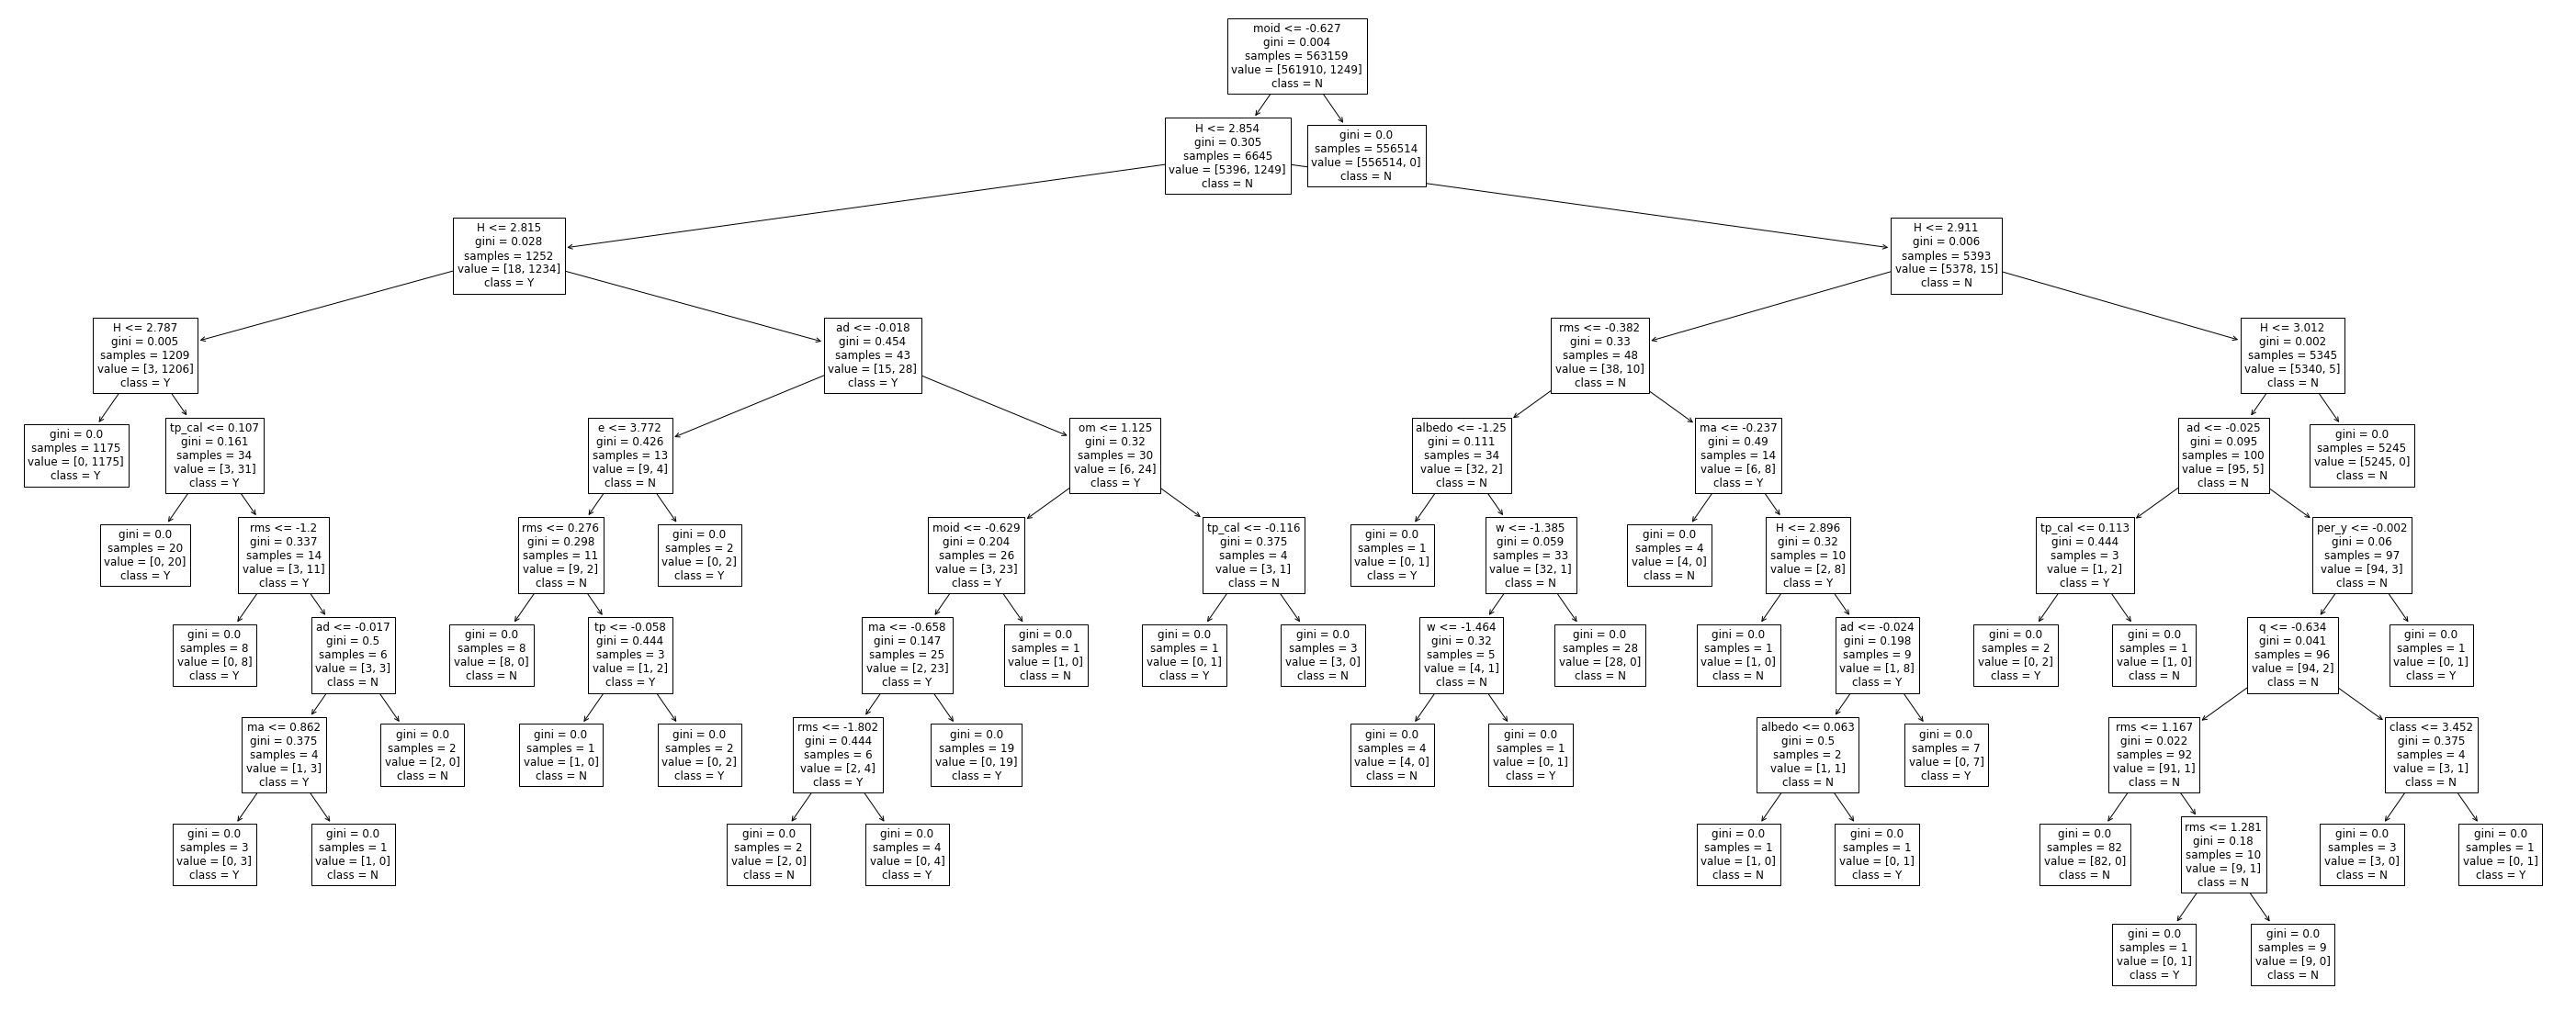

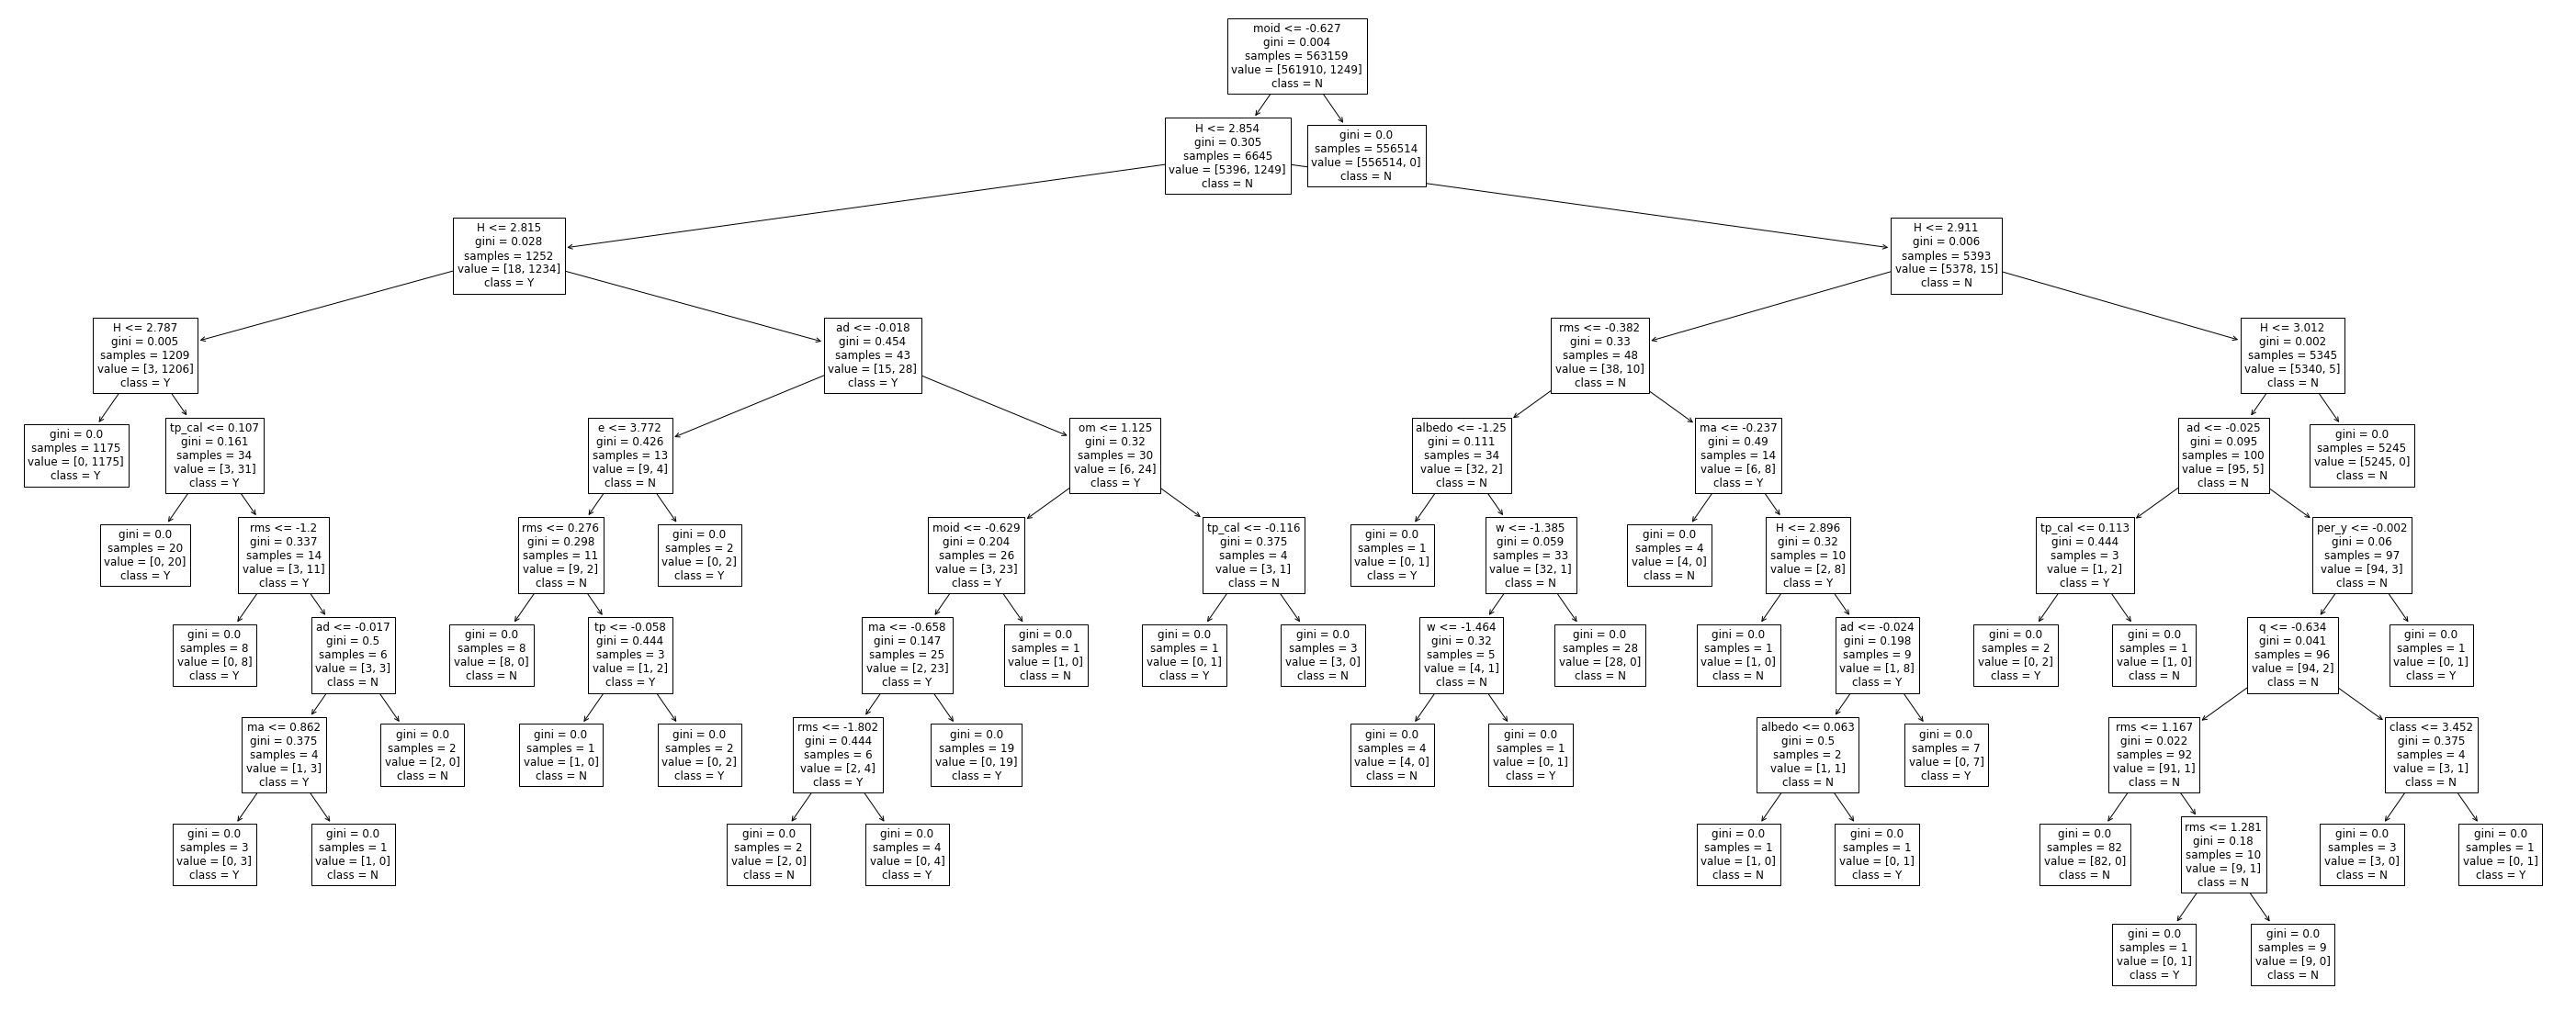

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
node_counts = [10, 100, 500]
def add_dt(max_nodes, x, y, x_test, y_test):
  dt = DecisionTreeClassifier(max_leaf_nodes=max_nodes, random_state=0)
  model = dt.fit(x, y)
  pred = model.predict(x_test)
  model_outputs[f"dt_{max_nodes}"] = model_outputs.get(f"dt_{max_nodes}", get_pred(dt, x, y, x_test))
  fig = plt.figure(figsize=(50,20))
  plot_tree(dt, feature_names=feats, class_names=['N','Y'])
  fig.savefig(f"/content/drive/MyDrive/Pictures/decistion_tree_{max_nodes}.png")
for count in node_counts:
  add_dt(count, X_train, y_train, X_test, y_test)

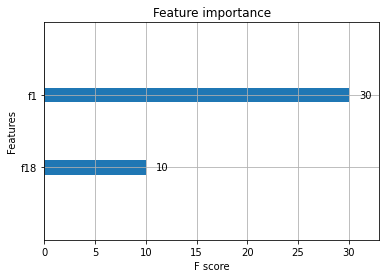

In [27]:
import xgboost as xgb
from xgboost import plot_importance
xgbmodel = xgb.XGBClassifier(objective='binary:logistic', booster='gbtree', n_estimators=10, max_depth=3, random_state=100)
model_outputs['xgb'] = model_outputs.get('xgb', get_pred(xgbmodel, X_train, y_train, X_test))

plot_importance(xgbmodel)
plt.show()


In [28]:
shape = X_train.shape

In [31]:
# Keras neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.wrappers import scikit_learn
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
#pha_new = df2.loc[:, 'pha'].map({'Y': 1, 'N': 0})

def create_model(learning_rate, activation):
  opt = Adam(lr=learning_rate)
  model = Sequential()
  model.add(Dense(30, input_shape = (21,), activation=activation))
  model.add(Dense(60, activation=activation))
  model.add(Dense(50, activation=activation))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics='accuracy')
  return model

#y_train =to_categorical(y_train, dtype='object') 
#y_test = to_categorical(y_test, dtype='object')
kmodel = scikit_learn.KerasClassifier(build_fn=create_model)
params = {'activation': ['relu'], 'batch_size': [200, 500], 'epochs': [3, 60], 'learning_rate': [0.001]}

random_search = RandomizedSearchCV(kmodel, param_distributions=params, cv=3, random_state=100)
search_results = random_search.fit(X_train, y_train)

print(f"Best {search_results.best_score_} using {search_results.best_params_}")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Epoch 1/3
1878/1878 [==============================] - 5s 2ms/step - loss: 0.0466 - accuracy: 0.9930
Epoch 2/3
1878/1878 [==============================] - 4s 2ms/step - loss: 0.0048 - accuracy: 0.9979
Epoch 3/3
939/939 [==============================] - 1s 1ms/step - loss: 0.0046 - accuracy: 0.9981
Epoch 1/3
1878/1878 [==============================] - 5s 2ms/step - loss: 0.0322 - accuracy: 0.9975
Epoch 2/3
1878/1878 [==============================] - 4s 2ms/step - loss: 0.0047 - accuracy: 0.9978
Epoch 3/3
939/939 [==============================] - 1s 1ms/step - loss: 0.0041 - accuracy: 0.9982
Epoch 1/3
1878/1878 [==============================] - 4s 2ms/step - loss: 0.0386 - accuracy: 0.9978
Epoch 2/3
1878/1878 [==============================] - 4s 2ms/step - loss: 0.0044 - accuracy: 0.9980
Epoch 3/3
939/939 [==============================] - 1s 1ms/step - loss: 0.0044 - accuracy: 0.9978
Epoch 1/60
1878/1878 [==============================] - 5s 2ms/step - loss: 0.0485 - accuracy: 0.

In [35]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop_catch = EarlyStopping(monitor='val_loss', patience=5)
check = ModelCheckpoint('/content/sample_data/best_asteroid.hdf5', save_best_only = True)

kmodel = create_model(0.001, 'relu')

call_back = kmodel.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), batch_size=500, callbacks=[early_stop_catch, check])
kpreds = kmodel.predict(X_test)



Epoch 1/60
1127/1127 [==============================] - 5s 4ms/step - loss: 0.0528 - accuracy: 0.9961 - val_loss: 0.0045 - val_accuracy: 0.9978
Epoch 2/60
1127/1127 [==============================] - 4s 4ms/step - loss: 0.0046 - accuracy: 0.9978 - val_loss: 0.0043 - val_accuracy: 0.9979
Epoch 3/60
1127/1127 [==============================] - 4s 4ms/step - loss: 0.0044 - accuracy: 0.9978 - val_loss: 0.0042 - val_accuracy: 0.9981
Epoch 4/60
1127/1127 [==============================] - 4s 4ms/step - loss: 0.0041 - accuracy: 0.9980 - val_loss: 0.0041 - val_accuracy: 0.9982
Epoch 5/60
1127/1127 [==============================] - 4s 4ms/step - loss: 0.0040 - accuracy: 0.9981 - val_loss: 0.0039 - val_accuracy: 0.9982
Epoch 6/60
1127/1127 [==============================] - 4s 4ms/step - loss: 0.0039 - accuracy: 0.9982 - val_loss: 0.0038 - val_accuracy: 0.9982
Epoch 7/60
1127/1127 [==============================] - 4s 4ms/step - loss: 0.0039 - accuracy: 0.9982 - val_loss: 0.0040 - val_accuracy:

In [36]:
model_outputs['keras'] = model_outputs.get('keras', kpreds)

In [37]:
# Comparison
from sklearn.metrics import log_loss
model_log_loss=[]
for key, value in model_outputs.items():
  model_log_loss.append([key, log_loss(y_true = y_test, y_pred = value)])

model_log_loss_sorted = sorted(model_log_loss, key = lambda model: model[1])

print("Cross-Entropy by Model, Low to High")
for model in model_log_loss_sorted:
  print(f"{model[0]}: {model[1]}")

Cross-Entropy by Model, Low to High
xgb: 0.002207931562511733
dt_10: 0.0025759176715424784
keras: 0.003651138413264185
dt_100: 0.0037718714610119534
dt_500: 0.0037718714610119534
logreg: 0.06246517665521463


## Challenges
Had trouble optimizing the Keras neural network, but still ended up with an acceptable cross-entropy loss
## Conclusion
With all models, we were able to achieve low cross-entropy, indicating high reproducability and applicability. The value of this is that it is possible to correlate the values of this database with potentially hazardous objects, though the keras model appears to be overfit somewhat.